<a href="https://colab.research.google.com/github/sayprincekumar20/NLP-Quara-Pairs-Duplicates/blob/main/Step1_Initial_question_paris_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df= pd.read_csv("questions.csv")

In [20]:
df.shape

(404351, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
111095,111095,220298,220299,What are some interesting Panchatantra stories?,What is the best Panchatantra story you have h...,0
158946,158946,314288,314289,Are there many Indians in north Carolina?,Would it be possible for your car to increase ...,0
173500,173500,342797,342798,What do you do if you have absolutely nothing ...,I have literally nothing to live for. What is ...,0
209661,209661,413562,413563,"My friend doesn't have a birth certificate, ID...",Can I still change my baby's name? She is just...,0
213356,213356,420751,420752,How k9protection works?,What is the objective of reaction between CuSO...,0
375434,375434,734482,734483,Why do people hate Aishwarya Rai?,Why do some Indians hate Bollywood actress Ais...,1
21809,21809,43511,43512,How do I reset my Gmail password when I don't ...,How do I reset my Gmail password when I don't ...,1
91969,91969,182601,182602,Should I go to IBS Hyderabad (ICFAI) for an MB...,"How is the MBA program at ICFAI, Hyderabad?",0
46877,46877,93336,93337,Would I be able to score 90+ in English 12 boa...,How do I score 95+ marks in my 12th board cbse...,0
350065,350065,685807,685808,Is there still a way to get paid on Quora?,Will people get paid to answer here?,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
# missing value
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [7]:
# duplicate row
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

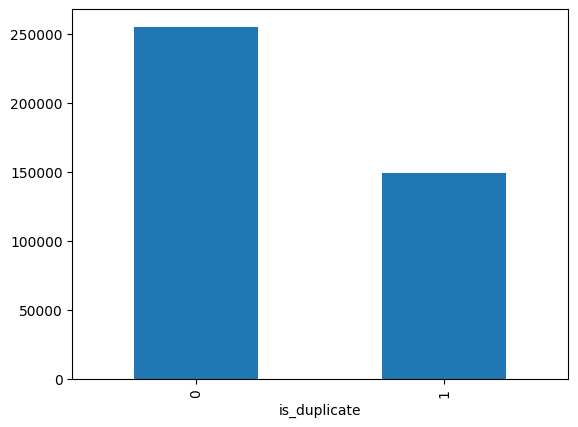

In [14]:
# Distribution of duplicate and non-duplicated quaetion
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')


In [17]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


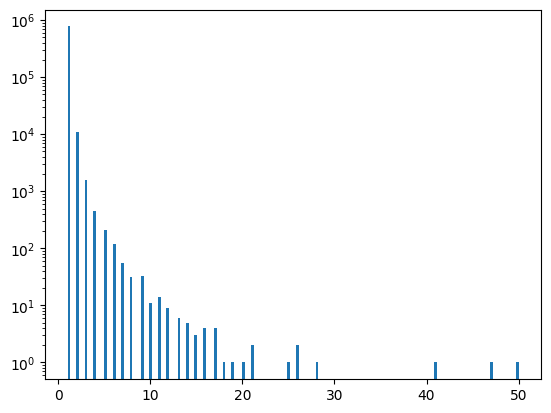

In [13]:
# Repeated questions histogram
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()